# Step - 1 : Importing Required Libraries
## The code begins by importing necessary libraries
 


In [10]:
import pandas as pd   # library for data manipulation and analysis where pd is alias for pandas
import numpy as np    #library for numerical computations where np is alias for numpy

import re    #built-in Python library for regular expressions (regex) pattern matching.
import string   #built-in Python library for string constants and classes

import spacy    # NLP (Natural Language Processing i.e., high level programming language) library for tokenization, entity recognition, and language modeling.

import gensim #A library for topic modeling and document similarity analysis.
from gensim  import corpora   # A module from Gensim for working with corpora (collections of text documents).

# libraries for visualization
import pyLDAvis  #A library for visualizing topic models, specifically Latent Dirichlet Allocation (LDA) models.
import pyLDAvis.gensim   #  module from pyLDAvis for working with Gensim topic models.
import matplotlib.pyplot as plt  #A popular plotting library for creating visualizations.
import seaborn as sns   #A visualization library built on top of Matplotlib for creating informative and attractive statistical graphics.
%matplotlib inline   
# A magic command in Jupyter notebooks to display Matplotlib plots inline, rather than in a separate window.

# Step - 2
>Loading Data

In [11]:
review_data= pd.read_csv("Reviews.csv")  #read_csv is a function from pandas that reads a CSV (Comma Separated Values) file into a pandas DataFrame object.
review_data.info()  #info() is a method of the DataFrame object that provides a concise summary of the data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [12]:
review_data.head(5) #to view top 5 entries of the data set from top

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
review_data.tail(5) #to view top 5 entries of the data set from bottom

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [14]:
review_data.shape #to know the dimension of data set

(568454, 10)

In [15]:
print(len(review_data)) #to know the length of data set(only no. of rows)

568454


In [16]:
print('Unique Products')
print(len(review_data.groupby('ProductId')))  # it will give unique no. products

Unique Products
74258


In [17]:
print('Unique Users')
print(len(review_data.groupby('UserId')))  # it will give total no. of unique user

Unique Users
256059


In [18]:
review_data.describe()
#describe method return description of data in dataframe (i.e- count,mean,std etc)

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [19]:
print("Total no. of null values : ")
review_data.isnull().sum() 

Total no. of null values : 


Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

# Step 3 :
>Cleaning and Preprocessing the Data \
>The code performs text cleaning, removal of stopwords, and lemmatization.

In [20]:
def clean_text(text ): #python function clean_text() that takes a string text as input and returns a cleaned version of the text
    delete_dict = {sp_character: '' for sp_character in string.punctuation} #string.punctuation is a pre-defined string constant in Python that contains all punctuation characters (e.g., !, @, #, $, etc.).
    delete_dict[' '] = ' ' #delete_dict that maps each punctuation character to an empty string ('')
    table = str.maketrans(delete_dict) #str.maketrans is a method that creates a translation table from a dictionary
    text1 = text.translate(table) #The translate method is called on the input text string, using the translation table created in the previous step
    textArr= text1.split() #The split method is called on the cleaned text text1, which splits the string into a list of words (textArr) using spaces as the delimiter.
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) #This line uses a list comprehension to filter out words that are either digits (w.isdigit()) or have a length of 3 or less (len(w) > 3).
    
    return text2.lower()   #The final cleaned text text2 is converted to lowercase using the lower() method

# Step 4: 
>Filtering Short Reviews and Sampling \
>The code filters reviews with a word count between 20 and 100, and samples 20,000 reviews for each score.

In [21]:
review_data.dropna(axis = 0, how ='any',inplace=True)  #dropna() is a Pandas function that drops rows (or columns) with missing values.
#how = 'any' specifies that we want to drop rows if any value in the row is missing.
#inplace = True means that the original DataFrame review_data will be modified in place, rather than creating a new DataFrame.
review_data['Text'] = review_data['Text'].apply(clean_text) #apply() is a Pandas function that applies a function to
  # each element in a Series (in this case, the Text column).

review_data['Num_words_text'] = review_data['Text'].apply(lambda x:len(str(x).split())) 
#The lambda function takes a text input x, converts it to a string using str(x),
#  splits the string into a list of words using split(), and returns the length of the list using len().

#Printing dataset statistics-----
print('-------Dataset --------')
print(review_data['Score'].value_counts())
print(len(review_data))
print('-------------------------')

max_review_data_sentence_length  = review_data['Num_words_text'].max() 
#This line finds the maximum number of words in any review text by taking the maximum value of the Num_words_text column.

mask = (review_data['Num_words_text'] < 100) & (review_data['Num_words_text'] >=20)

df_short_reviews = review_data[mask]
df_sampled = df_short_reviews.groupby('Score').apply(lambda x: x.sample(n=20000)).reset_index(drop = True)
#This line groups the df_short_reviews DataFrame by the Score column and applies a sampling function to each group.
print('No of Short reviews')
print(len(df_short_reviews))



-------Dataset --------
Score
5    363102
4     80654
1     52264
3     42638
2     29743
Name: count, dtype: int64
568401
-------------------------
No of Short reviews
373279


C:\Users\HP\AppData\Local\Temp\ipykernel_26396\645802591.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_short_reviews.groupby('Score').apply(lambda x: x.sample(n=20000)).reset_index(drop = True)


# Step 5 : 
**Removing Stopwords** \
The code removes stopwords from the sampled reviews. \
Stopwords are common words in a language that do not carry much meaning, such as:\

- 1.Articles (the, a, an) 
- 2.Prepositions (of, in, on) 
- 3.Conjunctions (and, but, or) 
- 4.Pronouns (I, you, he, she) 
- 5.Auxiliary verbs (is, are, am) 

These words are often ignored in text analysis and information retrieval tasks because they do not provide significant value to the meaning of the text.


In [22]:
import nltk  #nltk stands for Natural Language Toolkit, a library used for Natural Language Processing (NLP) tasks.
nltk.download('stopwords')  #nltk.download is a function that downloads and installs NLTK data packages, which are collections of linguistic resources, such as corpora, models, and dictionaries.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords  #This line imports the stopwords module from the nltk.corpus package.
stop_words = stopwords.words('english')   #The words() function returns a list of stopwords for the specified language (in this case, English).

# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
df_sampled['Text']=df_sampled['Text'].apply(remove_stopwords)

# Step 6: 
**Lemmatization-** Lemmatization in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.  \
The code lemmatizes the text to get the base form of words.

In [24]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner']) 
#The en_core_web_md model is a medium-sized model that includes tokenization, part-of-speech tagging, and word vectors.

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output
 


# Step 7 :
> **Text Tokenization:** NLTK offers tools to break down text into individual words or sentences


In [25]:
text_list=df_sampled['Text'].tolist() #.tolist() converts the Series (column) into a Python list.
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

bought 2pack orange flavor hour energy drink walmart tried bottle afternoon days later morning drank whole bottle real change dont drink coffee cant imagine made insensitive caffeinebr orange flavor tasted fine though kind like orange drink elementary school sounds like reviewers dont like berry lemonlime
['orange', 'flavor', 'hour', 'energy', 'drink', 'bottle', 'afternoon', 'day', 'late', 'morning', 'whole', 'bottle', 'real', 'change', 'coffee', 'insensitive', 'caffeinebr', 'orange', 'flavor', 'fine', 'reviewer']


# Step 8:
- Creating Dictionary and Document-Term Matrix 
- The code creates a dictionary and a document-term matrix required for LDA.

In [26]:
dictionary = corpora.Dictionary(tokenized_reviews)  #Dictionary is a class from corpora that creates a dictionary (a mapping of words to IDs) from a list of tokenized documents.

#doc_term_matrix is a list that will store the document-term matrices for each text sample.
#Bag-of-Words (BoW): This is a way of representing text data by counting the occurrences of each word in a document. The position or order of words is not considered, only their frequency.
#doc2bow is a sparse vector representation of the text sample.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews] 

# Step 9:
- **LDA:** LDA(Latent Dirichlet Allocation) is a way to discover hidden topics in a collection of documents. 
- Building the LDA Model. 
- The code builds the LDA model with 10 topics. 

In [27]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel 
#models is a module within gensim that provides various models for topic modeling, including LDA.
#ldamodel is a module within models that specifically provides the LDA model.
#LdaModel is a class within ldamodel that represents the LDA model.

# Build LDA model

lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100, chunksize=1000, passes=50,iterations=100)
#corpus: The input corpus, which is the doc_term_matrix created earlier. This is the numerical representation of the text data.
#id2word: The dictionary that maps word IDs to their corresponding words. This is the dictionary created earlier.
#num_topics: The number of topics to extract from the corpus. In this case, we're asking the model to identify 10 underlying topics.
#random_state: The random seed used to initialize the model. This ensures reproducibility of the results.
#chunksize: The number of documents to process in each iteration. This is a performance optimization parameter.
#passes: The number of passes through the corpus during training. This controls the convergence of the model.
#iterations: The number of iterations to perform during each pass. This also controls the convergence of the model.


In [28]:
lda_model.print_topics() 


[(0,
  '0.097*"treat" + 0.078*"dog" + 0.033*"cheese" + 0.024*"cracker" + 0.024*"cake" + 0.022*"ginger" + 0.022*"stomach" + 0.017*"seed" + 0.014*"cook" + 0.012*"puppy"'),
 (1,
  '0.043*"size" + 0.039*"small" + 0.034*"bottle" + 0.031*"large" + 0.017*"perfect" + 0.016*"container" + 0.016*"piece" + 0.015*"little" + 0.014*"salad" + 0.014*"caffeine"'),
 (2,
  '0.053*"water" + 0.025*"milk" + 0.025*"coconut" + 0.024*"cereal" + 0.021*"rice" + 0.019*"baby" + 0.017*"drink" + 0.015*"taste" + 0.011*"powder" + 0.011*"dish"'),
 (3,
  '0.033*"good" + 0.024*"great" + 0.024*"sugar" + 0.022*"cookie" + 0.022*"product" + 0.019*"chocolate" + 0.019*"healthy" + 0.017*"snack" + 0.017*"taste" + 0.017*"sweet"'),
 (4,
  '0.026*"butter" + 0.024*"time" + 0.022*"peanut" + 0.022*"product" + 0.019*"great" + 0.015*"energy" + 0.014*"long" + 0.013*"good" + 0.012*"work" + 0.011*"night"'),
 (5,
  '0.046*"price" + 0.041*"store" + 0.040*"product" + 0.039*"amazon" + 0.031*"good" + 0.029*"great" + 0.021*"order" + 0.018*"time" 

Output generated by LDA Model
This is the output of the LDA model, which represents the 10 topics extracted from the text data. Each topic is represented as a tuple, where:

The first element is the topic ID (an integer from 0 to 9).
The second element is a string that represents the topic, which is a weighted combination of words.
Each topic is represented as a weighted sum of words, where the weights are the importance of each word in that topic.
The words are listed in descending order of their weights, with the most important words appearing first.
exs--
Topic 0: Snacks and treats, with words like "snack", "cookie", "good", and "sweet".

Topic 1: Pet treats, with words like "treat", "dog", "small", and "great".


# Step 10:
- Visualizing the Topics
- The code visualizes the topics using pyLDAvis

In [29]:
# Visualize the topics

pyLDAvis.enable_notebook()
#enable_notebook() is a function that enables pyLDAvis to work within a Jupyter Notebook environment. 
# This function is necessary to render the visualization inline within the notebook.
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
#pyLDAvis.gensim is a module within pyLDAvis that provides functions for working with Gensim topic models.
#prepare() is a function that prepares the visualization data for the LDA model.
vis #to visualize

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.044445 -0.132490       1        1  16.216317
3      0.139328  0.052658       2        1  15.744445
8      0.143057  0.114206       3        1  13.280886
9      0.155945  0.074207       4        1  10.715327
4      0.002100 -0.074338       5        1   9.295403
7      0.118532  0.027127       6        1   8.787589
2     -0.007075  0.119949       7        1   7.484928
6     -0.053188 -0.097950       8        1   7.287149
1     -0.145328 -0.277017       9        1   6.899632
0     -0.397818  0.193649      10        1   4.288323, topic_info=        Term          Freq         Total Category  logprob  loglift
92      food  23307.000000  23307.000000  Default  30.0000  30.0000
21    coffee  30017.000000  30017.000000  Default  29.0000  29.0000
26    flavor  32731.000000  32731.000000  Default  28.0000  28.0000
85     price  14803.000000  14803.000000  Default  27.0000  27.0000
70     treat   8358.000000   8358.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
479  healthy    665.992030   8010.457765  Topic10  -4.8599   0.6620
6       love    640.553255  15244.586659  Topic10  -4.8989  -0.0204
705    happy    573.013244   5509.962669  Topic10  -5.0103   0.8859
285     year    606.895120  11793.791642  Topic10  -4.9528   0.1823
110   minute    519.376422   2769.836651  Topic10  -5.1086   1.4754

[536 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2310      5  0.999261        acid
2331      7  0.998348   addictive
2189      8  0.997385  affordable
18        5  0.998955   afternoon
299       2  0.999514     allergy
...     ...       ...         ...
285       6  0.036969        year
285       7  0.043158        year
285       8  0.264716        year
285      10  0.051468        year
602       4  0.998389      yogurt

[791 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 9, 10, 5, 8, 3, 7, 2, 1])

Explaination of the above output

Each bubble represents a topic. The larger the bubble, the higher percentage of the number of tweets in the corpus is about that topic.
Blue bars represent the overall frequency of each word in the corpus. If no topic is selected, the blue bars of the most frequently used words will be displayed.
Red bars give the estimated number of times a given term was generated by a given topic. As you can see from the image below, there are about 22,000 of the word ‘go’, and this term is used about 10,000 times within topic 1. The word with the longest red bar is the word that is used the most by the tweets belonging to that topic.

# Step 11: 
- Evaluating the Model
- The code evaluates the model using perplexity and coherence scores.

1.**Perplexity--** Perplexity is a measure of how well the topic model predicts new or unseen data. It reflects the generalization ability of the model. A low perplexity score means that the model is confident and accurate in its predictions. A high perplexity score means that the model is uncertain and inaccurate in its predictions


2.**Coherence --** Coherence is a measure of how well the words in a topic relate to each other. It reflects the human intuition of what makes a good topic. A high coherence score means that the topic is consistent, clear, and relevant. A low coherence score means that the topic is vague, noisy, or irrelevant.

In [30]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=50000)) 

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.09660338405953

Coherence Score:  0.3942818059683451


# Step 12:
- Finding the Optimal Number of Topics
- The code computes coherence values for different numbers of topics to find the optimal number.

In [31]:
# compute_coherence_values is a Python function named compute_coherence_values that computes coherence values for a range of topic 
# models using the Latent Dirichlet Allocation (LDA) algorithm
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3): 
    
    coherence_values = []
    model_list = [] #The function initializes two empty lists: coherence_values to store the coherence values, and model_list to store the corresponding LDA models.
    #The function initializes two empty lists: coherence_values to store the coherence values, and model_list to store the corresponding LDA models.
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [32]:
# Compute coherence values for LDA models with different number of topics
#model_list and coherence_values: Lists to store the LDA models and their corresponding coherence values.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=50, step=1)

# Step -13 
**Data Visualisation**


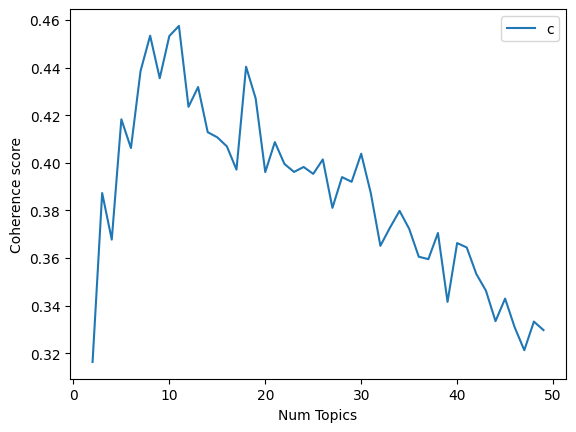

In [ ]:
#  this code creates a line plot showing the coherence score vs the number of topics,
#  with the x-axis ranging from 2 to 50 and the y-axis showing the coherence score values. 
# The plot has a title, x-axis label, y-axis label, and a legend.
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.title("Coherence Score vs Number of Topics")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Above graph is only for technical analysis of data

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values): 
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3163
Num Topics = 3  has Coherence Value of 0.3873
Num Topics = 4  has Coherence Value of 0.3677
Num Topics = 5  has Coherence Value of 0.4183
Num Topics = 6  has Coherence Value of 0.4062
Num Topics = 7  has Coherence Value of 0.4386
Num Topics = 8  has Coherence Value of 0.4534
Num Topics = 9  has Coherence Value of 0.4356
Num Topics = 10  has Coherence Value of 0.4533
Num Topics = 11  has Coherence Value of 0.4575
Num Topics = 12  has Coherence Value of 0.4235
Num Topics = 13  has Coherence Value of 0.4318
Num Topics = 14  has Coherence Value of 0.4129
Num Topics = 15  has Coherence Value of 0.4107
Num Topics = 16  has Coherence Value of 0.4069
Num Topics = 17  has Coherence Value of 0.3971
Num Topics = 18  has Coherence Value of 0.4404
Num Topics = 19  has Coherence Value of 0.4271
Num Topics = 20  has Coherence Value of 0.3961
Num Topics = 21  has Coherence Value of 0.4087
Num Topics = 22  has Coherence Value of 0.3995
Num Topics = 23  has 

Explaination of output : 
The loop will iterate over the entire range of x values (from 2 to 50) and print a message for each value, showing the corresponding coherence score.

In [ ]:
# Select the model and print the topics
optimal_model = model_list[7]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.029*"water" + 0.026*"good" + 0.019*"taste" + 0.016*"great" + 0.016*"butter" + 0.014*"product" + 0.014*"peanut" + 0.013*"coconut" + 0.013*"flavor" + 0.011*"sauce"'),
 (1,
  '0.064*"flavor" + 0.040*"taste" + 0.034*"chocolate" + 0.024*"good" + 0.024*"drink" + 0.018*"bean" + 0.016*"green" + 0.014*"sweet" + 0.012*"vanilla" + 0.012*"great"'),
 (2,
  '0.036*"chip" + 0.030*"good" + 0.028*"flavor" + 0.019*"great" + 0.011*"potato" + 0.011*"little" + 0.011*"taste" + 0.010*"love" + 0.009*"cheese" + 0.009*"salt"'),
 (3,
  '0.078*"food" + 0.035*"treat" + 0.028*"dog" + 0.019*"time" + 0.018*"cat" + 0.015*"year" + 0.013*"month" + 0.012*"small" + 0.011*"good" + 0.010*"great"'),
 (4,
  '0.029*"good" + 0.026*"snack" + 0.022*"healthy" + 0.020*"great" + 0.020*"sweet" + 0.018*"ingredient" + 0.016*"sugar" + 0.015*"food" + 0.014*"cookie" + 0.014*"cereal"'),
 (5,
  '0.121*"coffee" + 0.030*"good" + 0.023*"flavor" + 0.018*"strong" + 0.014*"great" + 0.012*"blend" + 0.011*"morning" + 0.010*"cup" + 0.010*"

Explaination of output : This string represents the topic model as a weighted sum of words.
Each word is accompanied by a weight value, which indicates the importance of that word in the topic.
The weights are represented as decimal values, and the words are separated by + symbols.
The words themselves are likely to be keywords or phrases that are relevant to the topic.

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook() # enable_notebook() enables the pyLDAvis library to work within a Jupyter Notebook environment.
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary) #the document-term matrix, which represents the frequency of each word in each document
#The trained topic model (in this case, the optimal model)
#the dictionary of words, which maps word IDs to word strings
vis #To print the output

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.149116 -0.077988       1        1  14.867549
0     -0.067331  0.015773       2        1  12.677880
4     -0.049082  0.045667       3        1  12.278110
5     -0.121372 -0.153146       4        1  12.148940
2      0.002291 -0.072340       5        1  11.822143
3      0.200842 -0.030625       6        1  11.286389
1     -0.247756 -0.057052       7        1  11.236532
6      0.170011  0.003063       8        1   9.091042
8     -0.036719  0.326648       9        1   4.591414, topic_info=         Term          Freq         Total Category  logprob  loglift
70     coffee  30235.000000  30235.000000  Default  30.0000  30.0000
114      food  23292.000000  23292.000000  Default  29.0000  29.0000
4      flavor  33224.000000  33224.000000  Default  28.0000  28.0000
34      store  13225.000000  13225.000000  Default  27.0000  27.0000
14     amazon  12997.000000  12997.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
46       free    567.750641   6955.509515   Topic9  -5.0880   0.5754
12      taste    558.725800  22825.628266   Topic9  -5.1040  -0.6290
139      well    461.653079   8650.056847   Topic9  -5.2949   0.1505
557   regular    448.362615   5514.103707   Topic9  -5.3241   0.5715
1299   recipe    407.332002   2532.653778   Topic9  -5.4201   1.2536

[650 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
4362       7  0.997069       acai
1534       7  0.998265     acidic
10388      9  0.998085   addicted
10406      5  0.996306  addicting
5135       9  0.998410  addictive
...      ...       ...        ...
1967       3  0.621472      yummy
1967       4  0.045555      yummy
1967       5  0.332794      yummy
1967       6  0.000480      yummy
5705       6  0.997280       zuke

[1644 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 5, 6, 3, 4, 2, 7, 9])

The top words for each topic, with their corresponding weights
The relationships between topics, including their similarity and overlap
The ability to hover over words to see their importance in each topic
The ability to select specific topics to see their word distributions and relationships
By visualizing the topics, you can gain a better understanding of the underlying themes and patterns in your text data.

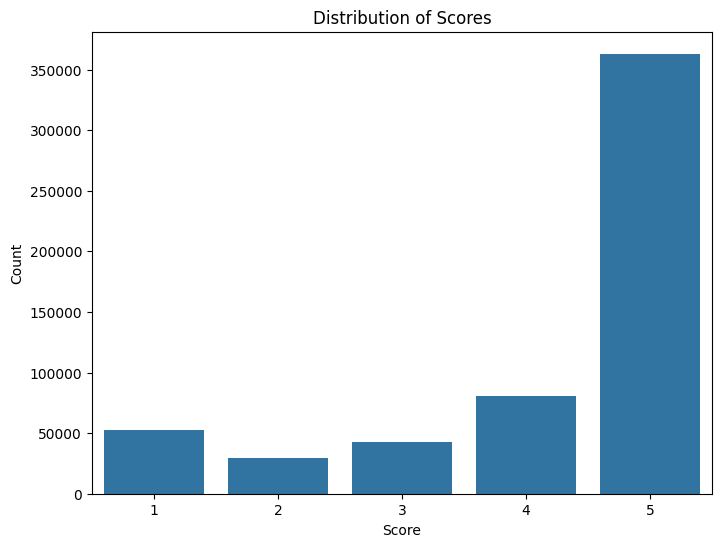

In [ ]:
#Distribution of Scores
plt.figure(figsize=(8,6))
sns.countplot(x='Score', data=review_data)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

The above plot will show the distribution of scores in the review data, with the x-axis representing the scores and the y-axis representing the count of reviews for each score. The plot will provide a visual representation of the score distribution, making it easier to understand the data.

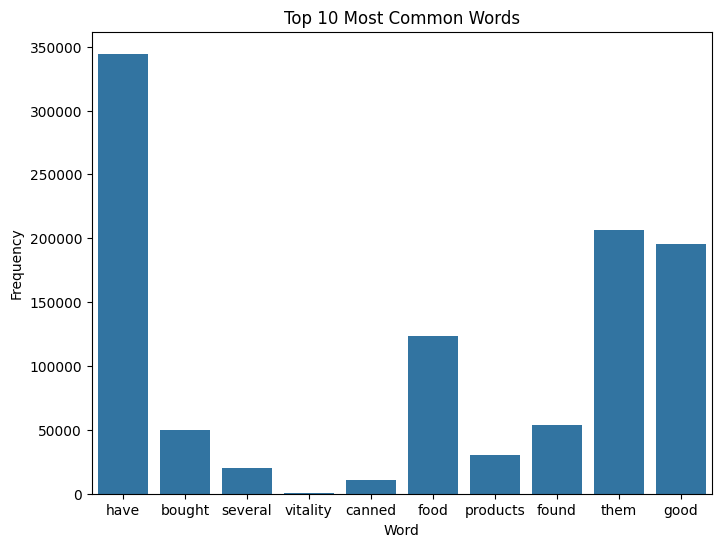

In [ ]:
#Top 10 Most Common Words
from collections import Counter
word_freq = Counter(" ".join(review_data['Text']).split())
plt.figure(figsize=(8,6))
sns.barplot(x=list(word_freq.keys())[:10], y=list(word_freq.values())[:10])
plt.title('Top 10 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

The resulting plot will show the top 10 most common words in the review data, with their corresponding frequencies. The plot will provide a visual representation of the most common words, making it easier to understand the content of the reviews.

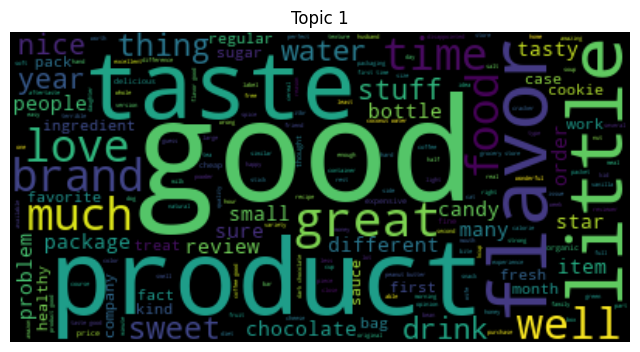

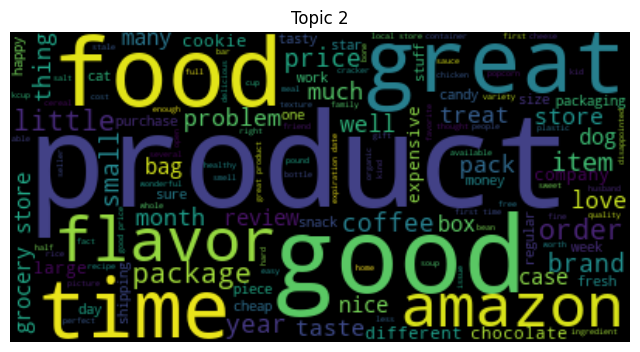

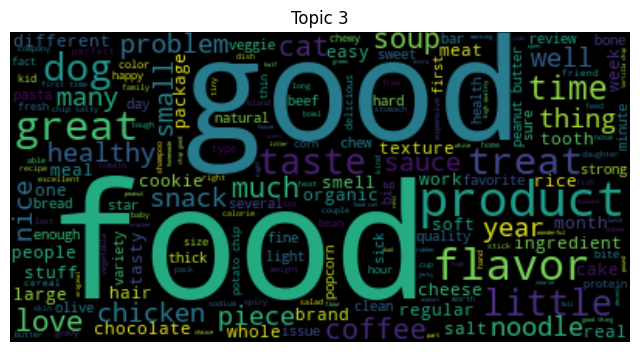

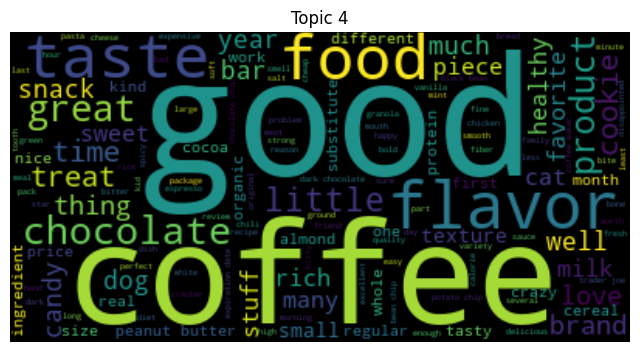

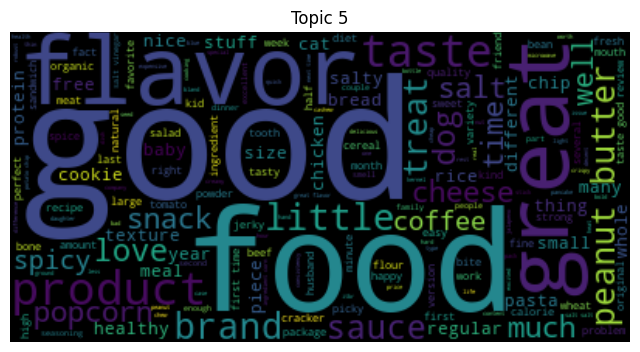

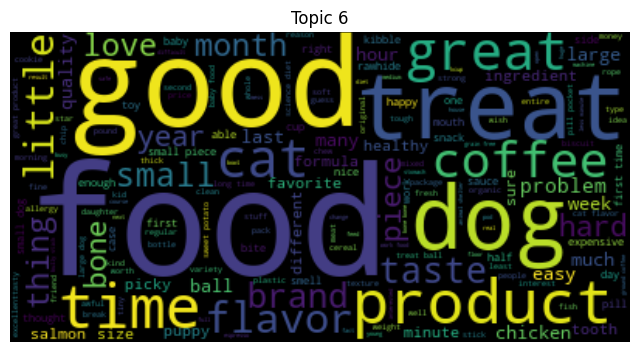

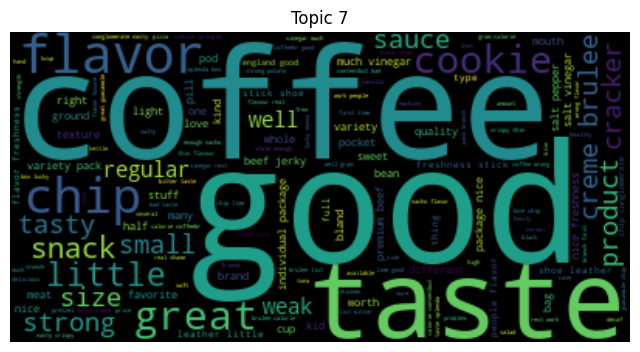

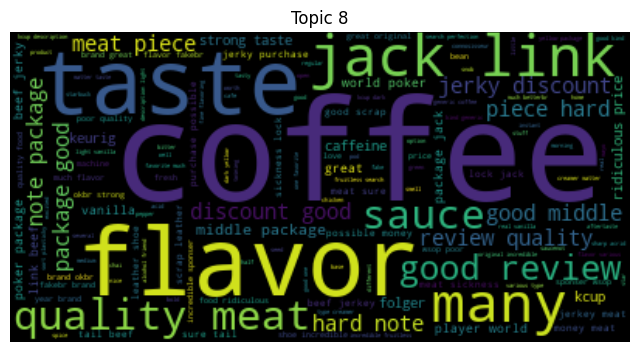

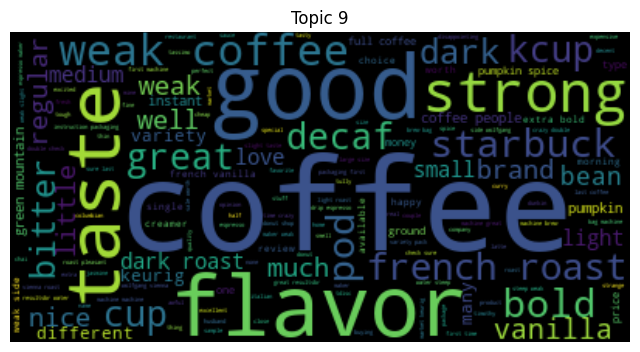

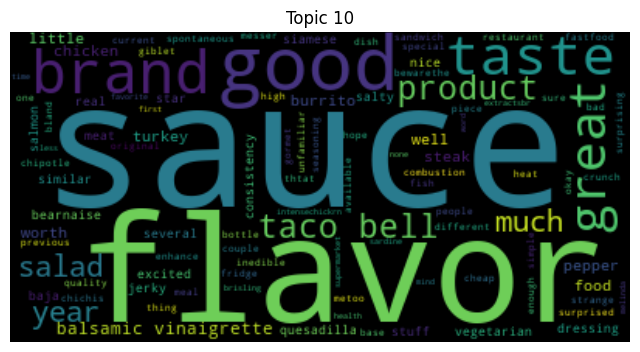

In [ ]:
# Word Cloud for Each Topic
from wordcloud import WordCloud

for i in range(10): #This loop iterates 10 times, generating a word cloud for each topic 
    topic_words = []
    for j in range(len(tokenized_reviews)): #This inner loop iterates over the tokenized reviews (i.e., the preprocessed text data).
        if lda_model[doc_term_matrix[j]][0][0] == i: # the code checks if the topic assignment of the current document (i.e., lda_model[doc_term_matrix[j]][0][0]) matches the current topic i. If it does, the words in the document are added to the topic_words list using topic_words.extend(tokenized_reviews[j]).
            topic_words.extend(tokenized_reviews[j])
    wordcloud = WordCloud().generate(' '.join(topic_words))
    plt.figure(figsize=(8,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Topic {}'.format(i+1))
    plt.show()

Above figure shows 10 word clouds, one for each topic, and display them in separate plots. Each word cloud will show the most prominent words associated with each topic, providing a visual representation of the topic's themes and concepts.

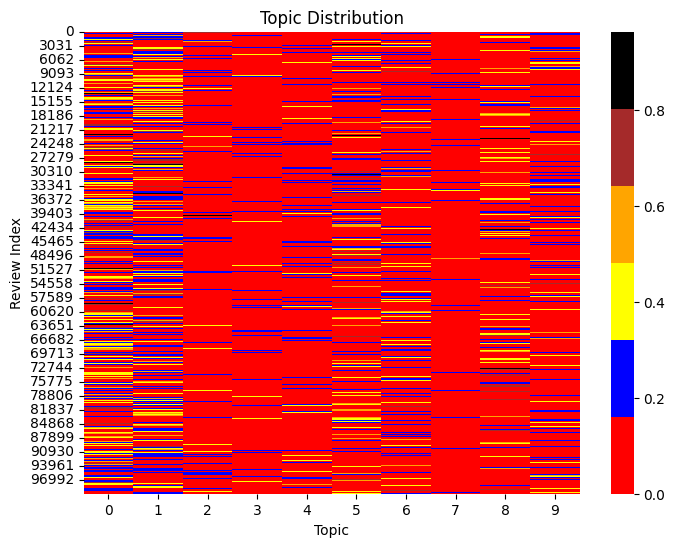

In [ ]:

# Assuming tokenized_reviews, lda_model, and doc_term_matrix are already defined
import matplotlib.colors as mcolors

num_topics = 10  # Assuming there are 10 topics
topic_weights = []

# Initialize topic_weights with zeros
for i in range(len(tokenized_reviews)):
    topic_weights.append([0] * num_topics)

# Populate topic_weights with the actual weights from lda_model
for i in range(len(tokenized_reviews)):
    for topic, weight in lda_model[doc_term_matrix[i]]:
        topic_weights[i][topic] = weight

topic_weights = np.array(topic_weights)

plt.figure(figsize=(8, 6))
sns.heatmap(topic_weights, cmap=mcolors.ListedColormap(['red',  'blue', 'yellow', 'orange',  'brown',  'black']))
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Review Index')
plt.show()


The x-axis represents the topic IDs (0 to 9, assuming there are 10 topics)
The y-axis represents the review indices (0 to N, where N is the number of reviews)
The color intensity in each cell represents the weight or importance of a topic in a particular review
The resulting heatmap shows the topic distribution for each review, where the x-axis represents the topics, and the y-axis represents the review indices. The color intensity in each cell represents the weight of the topic in that review. This visualization can help identify which topics are dominant in each review and how they are distributed across the dataset.
The output of this code is a heatmap visualization of the topic distribution for a set of reviews. Here's a breakdown of what the heatmap represents:

Heatmap Structure

The heatmap has a rectangular shape with the following dimensions:
X-axis (horizontal): 10 columns, representing the 10 topics identified by the LDA model.
Y-axis (vertical): len(tokenized_reviews) rows, representing the individual reviews in the dataset.
Each cell in the heatmap corresponds to a specific review-topic combination.
Color Representation

The color of each cell in the heatmap represents the weight or importance of the corresponding topic in that review.
The color intensity increases as the topic weight increases.
The 10 colors used in the colormap are:
Red
Blue
Yellow
Orange
Brown
Black

A cell with a bright or intense color indicates that the corresponding topic is dominant or highly relevant in that review.
A cell with a faint or pale color indicates that the corresponding topic is less important or less relevant in that review.
Reviews with similar topic distributions will have similar patterns of color in the heatmap.
Topics that are frequently co-occurring in reviews will have similar color patterns across multiple rows.
Example Insights

If a review has a bright red color in the first column, it means that Topic 1 is highly relevant in that review.
If a review has a faint blue color in the third column, it means that Topic 3 is less important in that review.
If multiple reviews have similar patterns of bright colors in columns 2, 5, and 8, it may indicate that Topics 2, 5, and 8 are frequently co-occurring in those reviews.
By analyzing the heatmap, you can gain insights into the topic distribution of the reviews, identify dominant topics, and understand how topics are related to each other.

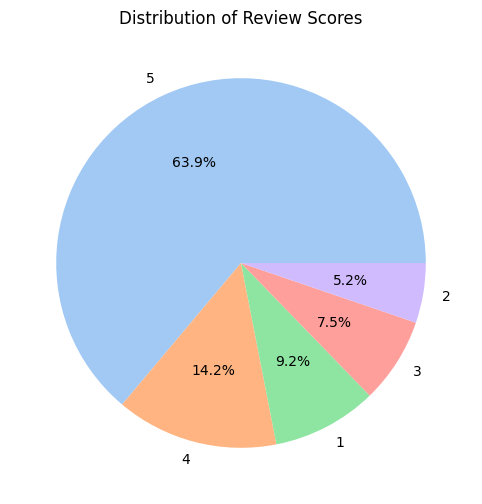

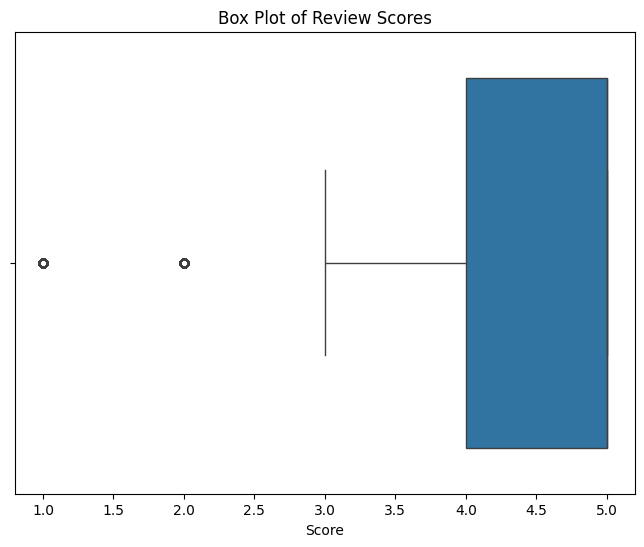

In [ ]:
# Pie chart of Score distribution
score_counts = review_data['Score'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Review Scores')
plt.show()

# Box plot of Score values
plt.figure(figsize=(8, 6))
sns.boxplot(x=review_data['Score'])
plt.title('Box Plot of Review Scores')
plt.xlabel('Score')
plt.show()

**For pie chart--**
The pie chart showing the distribution of review scores, with each wedge representing a unique score and its corresponding frequency. The chart will display the percentage of each score in the dataset, providing a visual representation of the score distribution.\
**For Box plot--**
The box plot showing the distribution of review scores, providing a visual representation of the central tendency, variability, and outliers in the data.

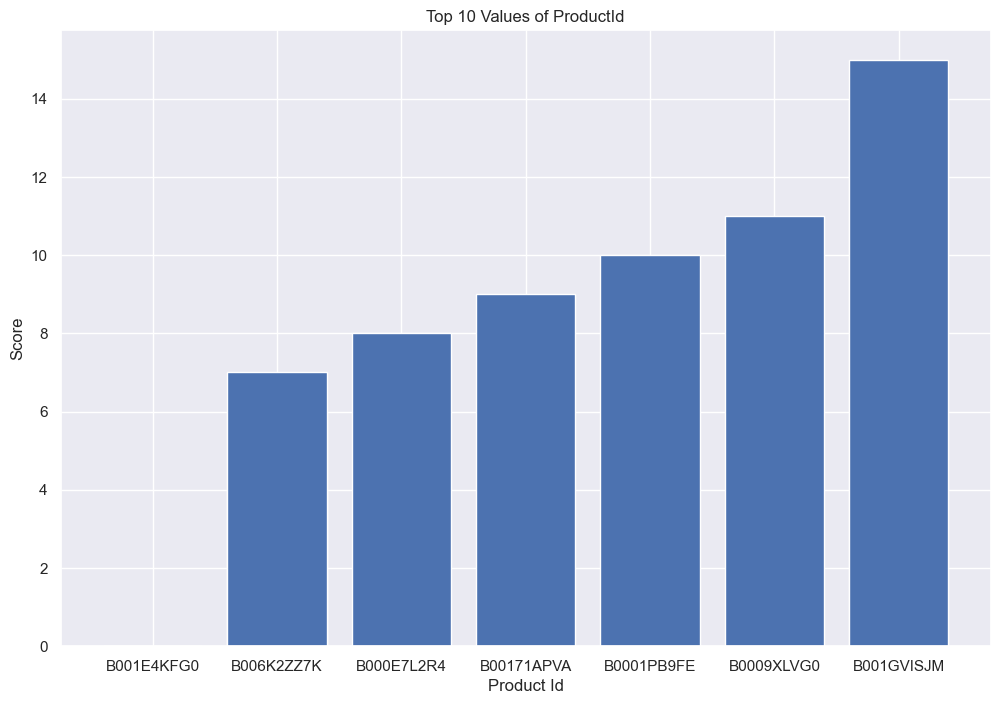

In [ ]:
# get the top 10 values of the column
top_10_values = review_data.nlargest(10, 'Score')
plt.rcParams['figure.figsize'] = (12, 8)
# plot the bar chart
plt.bar( top_10_values['ProductId'],top_10_values.index)
plt.xlabel('Product Id')
plt.ylabel('Score')
plt.title('Top 10 Values of {}'.format('ProductId'))
plt.show()

The above figure bar chart showing the top 10 products with the highest review scores, with the product IDs on the x-axis and the corresponding scores on the y-axis.

# Step - 14
- Here we are taking 5 different ProductId as input and printing their mean Score


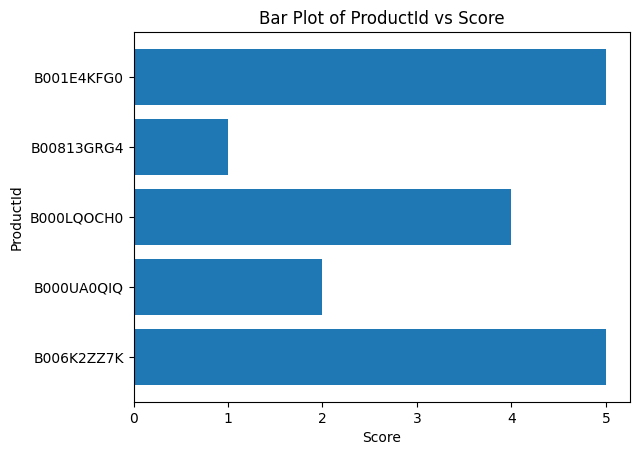

In [ ]:
# Accept 5 different ProductId
product_ids = []
for i in range(5):
    product_id = input(f"Enter ProductId {i+1}: ")
    product_ids.append(product_id)

# Filter the dataset to get the Scores for the selected ProductId
scores = []
for product_id in product_ids:
    score = review_data[review_data['ProductId'] == product_id]['Score'].mean()
    scores.append(score)

# Create a bar plot
plt.barh(product_ids, scores)
plt.xlabel("Score")
plt.ylabel("ProductId")
plt.title("Bar Plot of ProductId vs Score")
plt.show()